# Trabalho de Teoria dos Jogos
<b>Aluno:</b> Gustavo Henrique Pereira Godinho

<b>Tema:</b> Equilíbrio de Nash em jogos de soma zero no <i>plus/minus</i> de <i>lineups</i> de partidas da NBA.

<b>Sumário:</b>


<a href="#Objetivo-do-estudo">Objetivo do estudo</a><br>
<a href="#Definição-do-problema">Definição do problema</a><br>
<ul>
    <li><a href="#Descrição-dos-estados">Descrição dos estados</a>
    <li><a href="#Construção-das-matrizes-2-por-2">Construção das matrizes 2 por 2</a>
</ul>
<a href="#Leitura-dos-dados">Leitura dos dados</a><br>
<a href="#Cálculo-Equilíbrio-de-Nash">Cálculo Equilíbrio de Nash</a>
<ul>
    <li><a href="#Calculando-equilíbrios-de-Nash-em-todas-as-partidas">Calculando equilíbrios de Nash em todas as partidas</a>
    <li><a href="#Jogos-Degenerados">Remoção de Jogos Degenerados</a>  
</ul>
<a href="#Análise-de-dados">Análise de dados</a><br>
<ul>
    <li><a href="#Percentual-de-jogos-com-Equilíbrio-de-Nash-em-estratégias-puras-na-Temporada-Regular">Percentual de jogos com Equilíbrio de Nash em estratégias puras na Temporada Regular</a>
    <li><a href="#Percentual-de-jogos-com-Equilíbrio-de-Nash-em-estratégias-puras-nos-Playoffs">Percentual de jogos com Equilíbrio de Nash em estratégias puras nos Playoffs</a>
    <li><a href="#Partidas-com-Equilíbrio-de-Nash-em-estratégias-mistas-na-Temporada-Regular">Partidas com Equilíbrio de Nash em estratégias mistas na Temporada Regular</a>
    <li><a href="#Partidas-com-Equilíbrio-de-Nash-em-estratégias-mistas-nos-Playoffs">Partidas com Equilíbrio de Nash em estratégias mistas nos Playoffs</a>
    <li><a href="#Partidas-com-probabilidades-extremas-em-Equilíbrio-de-Nash-em-estratégias-mistas">Partidas com probabilidades extremas em Equilíbrio de Nash em estratégias mistas</a>
    <li><a href="#Partidas-com-maiores-probabilidades-de-ação-4-ou-5-titulares-para-o-agente-1-em-Equilíbrio-de-Nash">Partidas com maiores probabilidades de ação 4 ou 5 titulares para o agente 1 em Equilíbrio de Nash</a>
    <li><a href="#Partidas-com-maiores-probabilidades-de-ação-3-ou-menos-titulares-para-o-agente-1-em-Equilíbrio-de-Nash">Partidas com maiores probabilidades de ação 3 ou menos titulares para o agente 1 em Equilíbrio de Nash</a>
    <li><a href="#Partidas-com-maiores-probabilidades-de-ação-4-ou-5-titulares-para-o-agente-2-em-Equilíbrio-de-Nash">Partidas com maiores probabilidades de ação 4 ou 5 titulares para o agente 2 em Equilíbrio de Nash</a>
    <li><a href="#Partidas-com-maiores-probabilidades-de-ação-3-ou-menos-titulares-para-o-agente-2-em-Equilíbrio-de-Nash">Partidas com maiores probabilidades de ação 3 ou menos titulares para o agente 2 em Equilíbrio de Nash</a>
    <li><a href="#Diferenças-entre-as-probabilidades-em-estratégias-mistas-e-a-proporção-de-tempo-em-que-as-ações-foram-usadas-pelos-agentes">Diferenças entre as probabilidades em estratégias mistas e a proporção de tempo em que as ações foram usadas pelos agentes</a>
    <li><a href="#Diferença-entre-o-tempo-esperado-em-Equilíbrio-de-Nash-e-o-observado-para-as-partidas-da-Temporada-Regular-e-os-Playoffs">Diferença entre o tempo esperado em Equilíbrio de Nash e o observado para as partidas da Temporada Regular e os Playoffs</a>
    <li> <a href="#A-diferença-entre-o-tempo-esperado-em-Equilíbrio-de-Nash-e-o-observado-para-as-partidas-sofre-modificação-ao-longo-da-temporada?">A diferença entre o tempo esperado em Equilíbrio de Nash e o observado para as partidas sofre modificação ao longo da temporada?</a>
    <li> <a href="#Ordenação-das-equipes-por-seus-resultados-em-Equilíbrio-de-Nash-nas-matrizes-de-payoff">Ordenação das equipes por seus resultados em Equilíbrio de Nash nas matrizes de payoff</a>
</ul> <br>
<a href="#Conclusão-e-Trabalhos-futuros">Conclusão e Trabalhos futuros</a>


## Objetivo do estudo
 
O objetivo desse estudo é analisar as partidas da NBA na temporada 2008/09 e a partir dos jogadores em quadra de cada equipe, observar a diferença de pontos das equipes por número de titulares em quadra. Além disso, vamos verificar a proporção de jogos com ações dominadas e a diferença entre as proporções das estratégias mistas e a proporção de tempo em que cada ação ficou em quadra para a equipe mandante e visitante e depois disso verificar se existe modificação no comportamento das equipes nas partidas da Temporada Regular e do Playoff. O estudo será feito em jogos com matrizes de <i>payoff</i> 2 por 2. Os dados estão disponíveis em https://github.com/gustavohpgodinho/trabalho_teoria_dos_jogos.

As bibliotecas necessárias para a produção desse estudo são:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nashpy

## Definição do problema

A cada parada das 1315 partidas da temporada 2008/09 da NBA, foi coletado através da api da NBA, através da biblioteca <i>nba_api</i> do Python os jogadores em quadra de cada equipe em cada momento dos jogos e as estatísticas de desempenho dos jogadores. Um exemplo dos dados coletados são: 

In [2]:
link_arquivo = "https://raw.githubusercontent.com/gustavohpgodinho/trabalho_teoria_dos_jogos/main/tbl_lineups_2008_09.csv"
exemplo_lineup = pd.read_csv(link_arquivo)

exemplo_lineup[['GAME_ID', 'START_TIME', 'END_TIME', 'TEAM_CITY', 'PLAYER_NAME', 
                'START_POSITION', 'MIN', 'FGM', 'FGA','PTS', 'PLUS_MINUS']].head(10)

,GAME_ID,START_TIME,END_TIME,TEAM_CITY,PLAYER_NAME,START_POSITION,MIN,FGM,FGA,PTS,PLUS_MINUS
0,20800001,0,3220,Cleveland,LeBron James,F,5:22,1,3,2,8
1,20800001,0,3220,Cleveland,Ben Wallace,F,5:22,0,0,0,8
2,20800001,0,3220,Cleveland,Zydrunas Ilgauskas,C,5:22,1,1,3,8
3,20800001,0,3220,Cleveland,Delonte West,G,5:22,1,1,4,8
4,20800001,0,3220,Cleveland,Mo Williams,G,5:22,1,3,3,8
5,20800001,0,3220,Boston,Paul Pierce,F,5:22,1,3,2,-8
6,20800001,0,3220,Boston,Kevin Garnett,F,5:22,1,3,2,-8
7,20800001,0,3220,Boston,Kendrick Perkins,C,5:22,0,1,0,-8
8,20800001,0,3220,Boston,Ray Allen,G,5:22,0,3,0,-8
9,20800001,0,3220,Boston,Rajon Rondo,G,5:22,0,0,0,-8


Esses dados mostram que na partida de código <i>20800001</i> o Cleverland e o Boston estavam se enfrentando em Boston. Do segundo 0 ao segundo 3220 da partida, que representa os 5 minutos e 22 segundos iniciais, as equipes iniciaram com os seguintes lineups: 

<b>lineup Cleverland Cavaliers: </b> Lebron James, Ben Wallace, Zydrunas Ilgauskas, Delonte West e Mo Williams.

<b>lineup Boston Celtics: </b> Paul Pierce, Kevin Garnett, Kendrick Perkins, Ray Allen e Rajon Rondo.

Onde o Lebron James tentou 3 arremessos, acertou 1 e fez 2 pontos e o Cleverland Cavaliers fez 8 pontos a mais que o Boston Celtics nesses 5 minutos e 22 segundos. (12-4).

### Descrição dos estados

As ações disponíveis para as equipes mandantes e visitantes no fenômeno que queremos investigar são: 0, 1, 2, 3, 4 e 5 que são os números disponíveis da quantidade de titulares que estão em quadra em cada equipe. Por definição, a equipe mandante e visitante começam as partidas com 5 titulares de cada lado. 

O problema é que não podemos ter matrizes 6 por 6 pelo motivo que nas partidas raramente 5 titulares de uma equipe contra 0 titulares de outra equipe. Daí precisamos agrupar número de jogadores para ter matrizes menores. A definição das matrizes 2 por 2 que usaremos nesse estudo estão disponíveis a seguir:

### Construção das matrizes 2 por 2

Foi optado por matrizes 2 por 2 por serem mais simples e por poder agrupar os estados das partidas para que pudessemos ter mais partidas disponíveis. Basta determinar então qual é a divisão de dois estados que vai ser usada. A divisão de estados escolhidas foi a que gerou mais partidas com matriz de payoffs disponíveis:

**Divisões**
* **{(0, 1, 2, 3, 4), (5)}:** Divisão com as equipes podendo optar por jogar com 4 ou menos jogadores titulares ou então 5 jogadores titulares. Número de partidas disponíveis: **682**.
* **{(0, 1, 2, 3), (4, 5)}:** Divisão com as equipes podendo optar por jogar com 3 ou menos jogadores titulares ou então com 4 ou mais jogadores titulares. Número de partidas disponíveis: **1048**.
* **{(0, 1, 2), (3, 4, 5)}:** Divisão com as equipes podendo optar por jogar com 2 ou menos jogadores titulares ou então com 3 ou mais jogadores titulares. Número de partidas disponíveis: **1000**
* **{(0, 1), (2, 3, 4, 5)}:** Divisão com as equipes podendo optar por jogar com 1 ou menos jogadores titulares ou então com 2 ou mais jogadores titulares. Número de partidas disponíveis: **487**.
* **{(0), (1, 2, 3, 4, 5)}:** Divisão com as equipes podendo optar por jogar com 0 jogadores titulares ou então com 1 ou mais jogadores titulares. Número de partidas disponíveis: **30**.


A divisão escolhida foi **{(0, 1, 2, 3), (4, 5)}:** pois nessa divisão com os agentes 1 e 2 (equipe mandante e visitante) há 1048 partidas em que os agentes possuem as seguintes ações cada: {(0, 1, 2, 3), (4, 5)} e a matriz de payoff das equipes estão completamente preenchidas.

Como os jogos são de soma zero, as matrizes de payoff foram construídas considerando o plus/minus da equipe mandante(jogador linha), quando na célula da matriz existe um 8 quer dizer que naquele perfil de ações o agente linha fez 8 pontos mais que o agente coluna e quando existe um -15 significa que o agente linha fez 15 pontos menos que o agente coluna.

Um detalhe importante é que por vários momentos das partidas, elas podem estar num perfil de estratégias e daí somamos os *plus/minus* desses momentos para preencher a matriz de payoff. Isso foi feito também para os segundos em que cada perfil de estratégias esteve em quadra.

## Leitura dos dados

A leitura de dados está feita abaixo. Um exemplo é que nas linhas 0 e 1 está a matriz de payoff de um jogo. A coluna **nh** contém as ações disponíveis para o agente 1 (equipe mandante) e as colunas **j3210** e **j45** são as ações disponíveis para o agente 2 (equipe visitante) e contém os payoffs das ações.

Quando a equipe do Chicago Bulls estava com 3 ou menos jogadores titulares em quadra e a equipe do Milwaukee Bucks também estava com 3 ou menos titulares em quadra, o Bulls fez 3 pontos a mais. Quando o Chicago Bulls estava com 4 ou 5 jogadores titulares em quadra e o Milwaukee Bucks estava com 3 ou menos jogadores titulares em quadra o Bulls fez 7 pontos a mais que o adversário. 

Quando a equipe do Chicago Bulls estava com 3 ou menos jogadores titulares em quadra e a equipe do Milwaukee Bucks estava com 4 ou mais titulares em quadra, o Bulls fez 5 pontos a mais. Quando o Chicago Bulls estava com 4 ou 5 jogadores titulares em quadra e o Milwaukee Bucks também estava com 4 ou 5 jogadores titulares em quadra o Bulls fez 2 pontos a menos que o Milwaukee.

Por esses dados, pode parecer instintivo imaginar que o Milwaukee deveria manter pelo menos 4 jogadores titulares em quadra por todo o período para melhorar seu rendimento, mas a questão é que difícil manter 4 ou 5 titulares em quadra o tempo todo, por desgaste dos jogadores, situações do jogo, lesões, faltas e outros fatores que influenciam nessa decisão.

Note também que a soma dos payoffs (3+7+5-2) é igual a diferença no placar (108-95).


In [3]:
jogos = pd.read_csv("https://raw.githubusercontent.com/gustavohpgodinho/trabalho_teoria_dos_jogos/main/payoffs_2_2.csv")
jogos['GAME_ID'] = ['00'+ str(i) for i in jogos['GAME_ID']]
jogos.head()

,GAME_ID,GAME_DATE,SEASON_TYPE,MATCHUP,HOME_TEAM,AWAY_TEAM,HOME_PTS,AWAY_PTS,nh,j3210,j45
0,0020800002,2008-10-28,Regular Season,MIL @ CHI,Chicago Bulls,Milwaukee Bucks,108,95,j3210,3,5
1,0020800002,2008-10-28,Regular Season,MIL @ CHI,Chicago Bulls,Milwaukee Bucks,108,95,j45,7,-2
2,0020800003,2008-10-28,Regular Season,POR @ LAL,Los Angeles Lakers,Portland Trail Blazers,96,76,j3210,4,-2
3,0020800003,2008-10-28,Regular Season,POR @ LAL,Los Angeles Lakers,Portland Trail Blazers,96,76,j45,4,14
4,0020800004,2008-10-29,Regular Season,ATL @ ORL,Orlando Magic,Atlanta Hawks,85,99,j3210,-4,-13


A matriz de tempo jogado por estado também está disponível. Nas linhas 0 e 1 temos a mesma descrição de estados do exemplo anterior. Por exemplo, o Chigago Bulls jogou por 1158 segundos, ou seja, 19min18seg (dos 2880secs (48min) que possui o tempo regulamentar de uma partida de Basquete da NBA) com 3 ou menos jogadores titulares contra 3 ou menos jogadores titulares do Milwaukee Bucks. Outro exemplo é que o Bucks jogou por 897 segundos, ou seja, 14min57seg (197 seg + 700 seg) com 4 ou 5 titulares.

In [4]:
tempos_jogos = pd.read_csv("https://raw.githubusercontent.com/gustavohpgodinho/trabalho_teoria_dos_jogos/main/secs_2_2.csv")
tempos_jogos['GAME_ID'] = ['00'+ str(i) for i in tempos_jogos['GAME_ID']]
tempos_jogos.head()

,GAME_ID,GAME_DATE,SEASON_TYPE,MATCHUP,HOME_TEAM,AWAY_TEAM,nh,j3210,j45
0,0020800002,2008-10-28,Regular Season,MIL @ CHI,Chicago Bulls,Milwaukee Bucks,j3210,1158,197
1,0020800002,2008-10-28,Regular Season,MIL @ CHI,Chicago Bulls,Milwaukee Bucks,j45,825,700
2,0020800003,2008-10-28,Regular Season,POR @ LAL,Los Angeles Lakers,Portland Trail Blazers,j3210,1281,177
3,0020800003,2008-10-28,Regular Season,POR @ LAL,Los Angeles Lakers,Portland Trail Blazers,j45,285,1137
4,0020800004,2008-10-29,Regular Season,ATL @ ORL,Orlando Magic,Atlanta Hawks,j3210,797,498


Abaixo estão os histogramas dos valores presentes nas combinações das células nos jogos que temos disponíveis. Note que todos estão em torno de 0 e parecem simétricos, ou seja, não parece que uma combinação de estados deu em média vantagem ou desvantagem para as equipes mandantes sob as equipes visitantes.

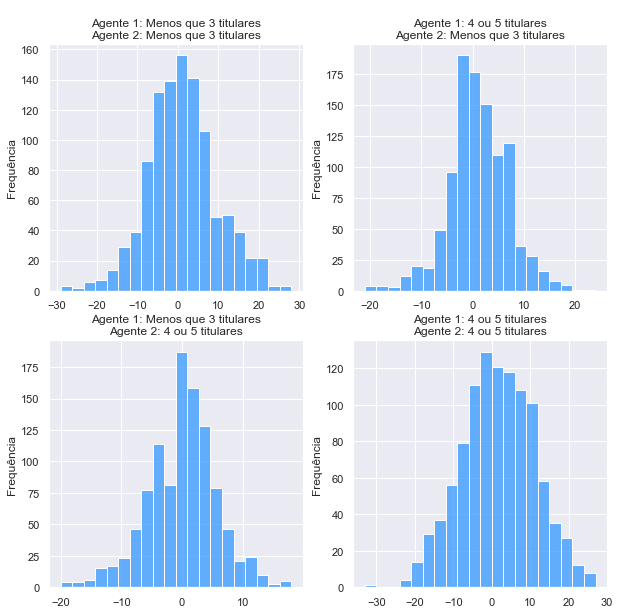

In [5]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize = (10, 10))
sns.histplot(data = jogos[jogos['nh'] == 'j3210'], x = "j3210", kde = False, color = "#3399ff", bins = 20, ax = axs[0, 0]).set(title = 'Agente 1: Menos que 3 titulares\nAgente 2: Menos que 3 titulares', xlabel = '', ylabel = 'Frequência')
sns.histplot(data = jogos[jogos['nh'] == 'j3210'], x = "j45", kde = False, color = "#3399ff", bins = 20, ax = axs[1, 0]).set(title = 'Agente 1: Menos que 3 titulares\nAgente 2: 4 ou 5 titulares', xlabel = '', ylabel = 'Frequência')
sns.histplot(data = jogos[jogos['nh'] == 'j45'], x = "j3210", kde = False, color = "#3399ff", bins = 20, ax = axs[0, 1]).set(title = ' \nAgente 1: 4 ou 5 titulares\nAgente 2: Menos que 3 titulares', xlabel = '', ylabel = 'Frequência')
sns.histplot(data = jogos[jogos['nh'] == 'j45'], x = "j45", kde = False, color = "#3399ff", bins = 20, ax = axs[1, 1]).set(title = 'Agente 1: 4 ou 5 titulares\nAgente 2: 4 ou 5 titulares', xlabel = '', ylabel = 'Frequência')
plt.show()


## Cálculo Equilíbrio de Nash

A função abaixo foi construída para calcular o equilíbrio de Nash a partir do pacote que vimos em sala Nashpy e as probabilidades de cada estado para cada jogador em estratégias mistas e a proporção de tempo em que cada uma das ações esteve em quadra para cada um dos agentes (equipe mandante e visitante). 

In [6]:
def calcula_equilibrio_nash(df, df_tempo, codigo_partida):
    
    colunas_jogo = ['nh','j3210', 'j45']
    colunas_retorno = ['GAME_ID', 'GAME_DATE','SEASON_TYPE', 'MATCHUP', 'HOME_TEAM', 'AWAY_TEAM', 'HOME_PTS', 'AWAY_PTS']
    
    mt = df[(df['GAME_ID'] == codigo_partida)][colunas_jogo].set_index('nh')
    matriz_payoff = nashpy.Game(np.array(mt))
    equilibrio_nash = list(matriz_payoff.support_enumeration(non_degenerate = True))
    degenerado = 0
    if(len(equilibrio_nash) > 1):
        print("A matriz de payoff da partida " + codigo_partida + " é degenerado")
        degenerado = 1
        
    dict_nash = {'nashpropj1aj3210': equilibrio_nash[0][0][0], 'nashpropj1aj45': equilibrio_nash[0][0][1], 
                 'nashpropj2aj3210': equilibrio_nash[0][1][0], 'nashpropj2aj45': equilibrio_nash[0][1][1], 
                 'degenerado': degenerado}
    
    # para o jogador 1
    n1 = list(df_tempo[(df_tempo['GAME_ID'] == codigo_partida)][colunas_jogo].\
              set_index('nh').sum(axis = 1)/2880)

    # para o jogador 2
    n2 = list(df_tempo[(df_tempo['GAME_ID'] == codigo_partida)][colunas_jogo].\
              set_index('nh').sum(axis = 0)/2880)
    
    dict_obs = {'obspropj1aj3210': n1[0], 'obspropj1aj45': n1[1], 
                'obspropj2aj3210': n2[0], 'obspropj2aj45': n2[1]}
    
    df1 = df[(df['GAME_ID'] == codigo_partida) & (df['nh'] == 'j3210')].\
    reset_index()[colunas_retorno]
    
    df1 = pd.concat([df1, 
                     pd.DataFrame(data = dict_nash, index = [0]), 
                     pd.DataFrame(data = dict_obs, index = [0])], axis = 1)
    
    return df1


O resultado abaixo é para a partida que foi dada o exemplo no início desse trabalho. Milwaukee Bucks contra Chicago Bulls em Chigago no dia 28 de Outubro de 2008. A matriz de payoff era essa: 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-amwm">mandante/visitante</th>
    <th class="tg-amwm">3 ou menos titulares</th>
    <th class="tg-amwm">4 ou 5 tiulares</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-amwm">3 ou menos titulares</td>
    <td class="tg-c3ow">3</td>
    <td class="tg-c3ow">5</td>
  </tr>
  <tr>
    <td class="tg-amwm">4 ou 5 titulares</td>
    <td class="tg-c3ow">7</td>
    <td class="tg-c3ow">-2</td>
  </tr>
</tbody>
</table>

Daí o equilíbrio de Nash por estratégias mistas para o agente 1 (Chicago Bulls) é: 0,8181 em 3 jogadores titulares ou menos e 0,1818 em 4 ou mais jogadores titulares e para o agente 2 (Milwaukee Bucks) é: 0,6363 em 3 jogadores titulares ou menos e 0,3636 em 4 ou mais jogadores titulares.

In [7]:
calcula_equilibrio_nash(jogos, tempos_jogos, '0020800002')[['GAME_ID', 'GAME_DATE', 'SEASON_TYPE', 'MATCHUP', 'HOME_TEAM',
                                                            'AWAY_TEAM', 'HOME_PTS', 'AWAY_PTS']]

,GAME_ID,GAME_DATE,SEASON_TYPE,MATCHUP,HOME_TEAM,AWAY_TEAM,HOME_PTS,AWAY_PTS
0,0020800002,2008-10-28,Regular Season,MIL @ CHI,Chicago Bulls,Milwaukee Bucks,108,95


In [8]:
calcula_equilibrio_nash(jogos, tempos_jogos, '0020800002')[['nashpropj1aj3210', 'nashpropj1aj45', 'nashpropj2aj3210',
                                                            'nashpropj2aj45', 'obspropj1aj3210', 'obspropj1aj45', 
                                                            'obspropj2aj3210', 'obspropj2aj45', 'degenerado']]

,nashpropj1aj3210,nashpropj1aj45,nashpropj2aj3210,nashpropj2aj45,obspropj1aj3210,obspropj1aj45,obspropj2aj3210,obspropj2aj45,degenerado
0,0.818182,0.181818,0.636364,0.363636,0.470486,0.529514,0.688542,0.311458,0


### Calculando equilíbrios de Nash em todas as partidas

Os comandos abaixo faz o cálculo do equilíbrio de Nash para todas as partidas disponíveis da temporada 2008/09:

In [9]:
lst_nash = []
for i in jogos['GAME_ID'].unique():
    xdf = calcula_equilibrio_nash(jogos, tempos_jogos, i)
    lst_nash.append(xdf)

C:\Users\Gustavo Godinho\Anaconda3\lib\site-packages\nashpy\algorithms\support_enumeration.py:259: RuntimeWarning: 
An even number of (2) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)


A matriz de payoff da partida 0020800079 é degenerado
A matriz de payoff da partida 0020800112 é degenerado
A matriz de payoff da partida 0020800117 é degenerado
A matriz de payoff da partida 0020800137 é degenerado
A matriz de payoff da partida 0020800151 é degenerado
A matriz de payoff da partida 0020800166 é degenerado
A matriz de payoff da partida 0020800176 é degenerado
A matriz de payoff da partida 0020800214 é degenerado
A matriz de payoff da partida 0020800216 é degenerado
A matriz de payoff da partida 0020800273 é degenerado
A matriz de payoff da partida 0020800297 é degenerado
A matriz de payoff da partida 0020800303 é degenerado
A matriz de payoff da partida 0020800315 é degenerado
A matriz de payoff da partida 0020800368 é degenerado
A matriz de payoff da partida 0020800369 é degenerado
A matriz de payoff da partida 0020800373 é degenerado
A matriz de payoff da partida 0020800408 é degenerado
A matriz de payoff da partida 0020800420 é degenerado
A matriz de payoff da partid

### Jogos Degenerados

Eu vou retirar as matrizes de payoff que são jogos degenerados porque para esses jogos temos mais que um equilíbrio de Nash e todos eles são puros.

In [10]:
#52 jogos
jogos_degenerados = ['0020800079', '0020800112', '0020800117', '0020800137', '0020800151', '0020800166', '0020800176', 
                     '0020800214', '0020800216', '0020800273', '0020800297', '0020800303', '0020800315', '0020800368',
                     '0020800369', '0020800373', '0020800408', '0020800420', '0020800466', '0020800468', '0020800493',
                     '0020800495', '0020800534', '0020800580', '0020800596', '0020800600', '0020800661', '0020800732',
                     '0020800741', '0020800766', '0020800801', '0020800810', '0020800819', '0020800840', '0020800882', 
                     '0020800887', '0020800889', '0020800923', '0020800927', '0020800935', '0020801022', '0020801023',
                     '0020801065', '0020801067', '0020801090', '0020801091', '0020801145', '0020801157', '0020801158', 
                     '0040800145', '0040800161', '0040800222']

Veja que como a definição de jogos degenerados temos para esses jogos 2 melhores respostas em Equilíbrios de Nash em estratégias puras, ou seja, o tamanho do suporte em estratégias mistas é 1 e o número de melhores respostas para a estratégia é 2, o que leva ao jogo ser degenerado. 
Note o comportamento dos jogos degenerados:

In [11]:
jogos[jogos['GAME_ID'].isin(jogos_degenerados)]

,GAME_ID,GAME_DATE,SEASON_TYPE,MATCHUP,HOME_TEAM,AWAY_TEAM,HOME_PTS,AWAY_PTS,nh,j3210,j45
126,0020800079,2008-11-08,Regular Season,NJN @ IND,Indiana Pacers,New Jersey Nets,98,80,j3210,4,0
127,0020800079,2008-11-08,Regular Season,NJN @ IND,Indiana Pacers,New Jersey Nets,98,80,j45,7,7
182,0020800112,2008-11-12,Regular Season,LAL @ NOH,New Orleans Hornets,Los Angeles Lakers,86,93,j3210,0,0
183,0020800112,2008-11-12,Regular Season,LAL @ NOH,New Orleans Hornets,Los Angeles Lakers,86,93,j45,0,-7
190,0020800117,2008-11-13,Regular Season,DEN @ CLE,Cleveland Cavaliers,Denver Nuggets,110,99,j3210,10,-1
...,...,...,...,...,...,...,...,...,...,...,...
1999,0040800145,2009-04-27,Playoffs,UTA @ LAL,Los Angeles Lakers,Utah Jazz,107,96,j45,6,6
2008,0040800161,2009-04-18,Playoffs,DAL @ SAS,San Antonio Spurs,Dallas Mavericks,97,105,j3210,-4,3
2009,0040800161,2009-04-18,Playoffs,DAL @ SAS,San Antonio Spurs,Dallas Mavericks,97,105,j45,-4,-3
2048,0040800222,2009-05-06,Playoffs,HOU @ LAL,Los Angeles Lakers,Houston Rockets,111,98,j3210,-6,3


Os resultados dos jogos com Equilíbrio de Nash calculados estão armazenados no dataframe abaixo, quebrado em duas células para conseguir ver tudo.

In [12]:
xdf_nash = pd.concat(lst_nash, axis = 0).reset_index().drop(['index'], axis = 1)
xdf_nash['estrategia_pura'] = (xdf_nash['nashpropj1aj3210'].isin([0,1]))

In [13]:
xdf_nash[['GAME_ID', 'GAME_DATE', 'SEASON_TYPE', 'MATCHUP', 'HOME_TEAM',
          'AWAY_TEAM', 'HOME_PTS', 'AWAY_PTS']].head()

,GAME_ID,GAME_DATE,SEASON_TYPE,MATCHUP,HOME_TEAM,AWAY_TEAM,HOME_PTS,AWAY_PTS
0,0020800002,2008-10-28,Regular Season,MIL @ CHI,Chicago Bulls,Milwaukee Bucks,108,95
1,0020800003,2008-10-28,Regular Season,POR @ LAL,Los Angeles Lakers,Portland Trail Blazers,96,76
2,0020800004,2008-10-29,Regular Season,ATL @ ORL,Orlando Magic,Atlanta Hawks,85,99
3,0020800006,2008-10-29,Regular Season,NJN @ WAS,Washington Wizards,New Jersey Nets,85,95
4,0020800007,2008-10-29,Regular Season,MIA @ NYK,New York Knicks,Miami Heat,120,115


In [14]:
xdf_nash[['nashpropj1aj3210', 'nashpropj1aj45', 'nashpropj2aj3210',
          'nashpropj2aj45', 'obspropj1aj3210', 'obspropj1aj45', 
          'obspropj2aj3210', 'obspropj2aj45', 'degenerado', 'estrategia_pura']].head()

,nashpropj1aj3210,nashpropj1aj45,nashpropj2aj3210,nashpropj2aj45,obspropj1aj3210,obspropj1aj45,obspropj2aj3210,obspropj2aj45,degenerado,estrategia_pura
0,0.818182,0.181818,0.636364,0.363636,0.470486,0.529514,0.688542,0.311458,0,False
1,0.000000,1.000000,1.000000,0.000000,0.506250,0.493750,0.543750,0.456250,0,True
2,0.000000,1.000000,0.000000,1.000000,0.449653,0.550347,0.338889,0.661111,0,True
3,1.000000,0.000000,1.000000,0.000000,0.502778,0.497222,0.563542,0.436458,0,True
4,0.545455,0.454545,0.727273,0.272727,0.484028,0.515972,0.311111,0.688889,0,False


## Análise de dados

### Percentual de jogos com Equilíbrio de Nash em estratégias puras na Temporada Regular

A seguir começa a análise dos resultados que foram obtidos. O primeiro passo é verificarmos os Equilíbrios de Nash em estratégias puras. Quando se têm estratégias puras nesses jogos 2 por 2 de soma zero, significa que algum dos agentes possuia alguma ação que dominava a outra. A quantidade de jogos com estratégias puras na **Temporada Regular** é:

In [15]:
xdf1 = xdf_nash[['nashpropj1aj45' ,'nashpropj2aj45']][(xdf_nash['estrategia_pura'] == 1) & 
                                                      (xdf_nash['degenerado'] == 0) & 
                                                      (xdf_nash['SEASON_TYPE'] == "Regular Season")].value_counts()
xdf1 = pd.DataFrame(xdf1).reset_index()
xdf1.rename(columns = {0:'freq'}, inplace = True)
xdf1['percentual'] = 100*xdf1['freq']/xdf_nash[(xdf_nash['SEASON_TYPE'] == "Regular Season") & 
                                               (xdf_nash['degenerado'] == 0) & 
                                               ~(xdf_nash['GAME_ID'].isin(jogos_degenerados))].shape[0]
xdf1

,nashpropj1aj45,nashpropj2aj45,freq,percentual
0,1.0,0.0,192,20.779221
1,0.0,1.0,192,20.779221
2,1.0,1.0,124,13.419913
3,0.0,0.0,94,10.173160


Isso significa que: 
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-vxga{background-color:#ffffff;text-align:center;vertical-align:middle}
.tg .tg-haiz{background-color:#ffffff;font-weight:bold;text-align:center;vertical-align:middle}
.tg .tg-5j4b{background-color:#ffffff;font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-5j4b">mandante</th>
    <th class="tg-5j4b">visitante</th>
    <th class="tg-5j4b">frequência</th>
    <th class="tg-5j4b">percentual</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-haiz"><span style="font-weight:bold">3 ou menos titulares</span></td>
    <td class="tg-5j4b"><span style="font-weight:bold">3 ou menos titulares</span></td>
    <td class="tg-vxga">94</td>
    <td class="tg-vxga">10,17</td>
  </tr>
  <tr>
    <td class="tg-5j4b"><span style="font-weight:bold">3 ou menos titulares</span></td>
    <td class="tg-5j4b"><span style="font-weight:bold">4 ou 5 tiulares</span></td>
    <td class="tg-vxga">192</td>
    <td class="tg-vxga">20,78</td>
  </tr>
  <tr>
    <td class="tg-5j4b"><span style="font-weight:bold">4 ou 5 tiulares</span></td>
    <td class="tg-5j4b"><span style="font-weight:bold">3 ou menos titulares</span></td>
    <td class="tg-vxga">192</td>
    <td class="tg-vxga">20,78</td>
  </tr>
  <tr>
    <td class="tg-5j4b"><span style="font-weight:bold">4 ou 5 tiulares</span></td>
    <td class="tg-5j4b"><span style="font-weight:bold">4 ou 5 tiulares</span></td>
    <td class="tg-vxga">124</td>
    <td class="tg-vxga">13,42</td>	
  </tr>
</tbody>
</table>


Ou seja, dos 924 jogos disponíveis que temos na Temporada Regular, 65,15% deles possuíam uma estratégia dominada para algum dos jogadores. 

### Percentual de jogos com Equilíbrio de Nash em estratégias puras nos Playoffs

Já nos **playoffs** o percentual de partidas com Equilíbrio de Nash em estratégias puras é:

In [16]:
xdf1 = xdf_nash[['nashpropj1aj45', 'nashpropj2aj45']][(xdf_nash['estrategia_pura'] == 1) & 
                                                      (xdf_nash['degenerado'] == 0) & 
                                                      (xdf_nash['SEASON_TYPE'] == "Playoffs")].value_counts()

xdf1 = pd.DataFrame(xdf1).reset_index()
xdf1.rename(columns = {0:'freq'}, inplace = True)
xdf1['percentual'] = 100*xdf1['freq']/xdf_nash[(xdf_nash['SEASON_TYPE'] == "Playoffs") & 
                                               (xdf_nash['degenerado'] == 0)].shape[0]
xdf1


,nashpropj1aj45,nashpropj2aj45,freq,percentual
0,0.0,1.0,18,25.000000
1,1.0,0.0,16,22.222222
2,1.0,1.0,10,13.888889
3,0.0,0.0,5,6.944444


Isso é: 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-haiz{background-color:#ffffff;font-weight:bold;text-align:center;vertical-align:middle}
.tg .tg-5j4b{background-color:#ffffff;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-aag1{background-color:#ffffff;text-align:right;vertical-align:middle}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-5j4b">mandante</th>
    <th class="tg-5j4b">visitante</th>
    <th class="tg-5j4b">frequência</th>
    <th class="tg-5j4b">percentual</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-haiz"><span style="font-weight:bold">3 ou menos titulares</span></td>
    <td class="tg-5j4b"><span style="font-weight:bold">3 ou menos titulares</span></td>
    <td class="tg-aag1">5</td>
    <td class="tg-aag1">6,94</td>
  </tr>
  <tr>
    <td class="tg-5j4b"><span style="font-weight:bold">3 ou menos titulares</span></td>
    <td class="tg-5j4b"><span style="font-weight:bold">4 ou 5 tiulares</span></td>
    <td class="tg-aag1">18</td>
    <td class="tg-aag1">25</td>
  </tr>
  <tr>
    <td class="tg-5j4b"><span style="font-weight:bold">4 ou 5 tiulares</span></td>
    <td class="tg-5j4b"><span style="font-weight:bold">3 ou menos titulares</span></td>
    <td class="tg-aag1">16</td>
    <td class="tg-aag1">22,22</td>
  </tr>
  <tr>
    <td class="tg-5j4b"><span style="font-weight:bold">4 ou 5 tiulares</span></td>
    <td class="tg-5j4b"><span style="font-weight:bold">4 ou 5 tiulares</span></td>
    <td class="tg-aag1">10</td>
    <td class="tg-aag1">13,88</td>
  </tr>
</tbody>
</table>

Ou seja, 68,05% dos 72 jogos disponíveis para os playoffs possuem uma estratégia dominada para algum dos jogadores.

Note que não é muito diferente o percentual do total de partidas com estratégias dominadas na Temporada Regular e nos Playoffs. Além disso, a quantidade de jogos com **4 ou 5 titulares** de um agente contra **3 ou menos titulares** de outro agente com estratégias dominadas de algum dos jogadores é quase o dobro do perfil de estratégias em que os dois agentes lançam da mesma ação em partidas da Temporada Regular e dos Playoffs.

NA NBA existe uma clara ordenação de força entre as equipes, então esse alto percentual de equilíbrios de Nash em estratégias puras é esperado. Em jogos que estratégias puras foram encontradas, significa que existe alguma ação que é dominada por outra para pelo menos um dos jogadores. Isso implica que independente do que um dos jogadores fizer, ele estará melhor ou pior que o outro jogador com estratégia fixada e isso vai de encontro com a hierarquia de qualidade das equipes: uma equipe melhor pode jogar com 3 ou menos titulares contra qualquer formação de uma equipe fraca que mesmo assim vai obter um plus/minus que lhe agrada.

### Partidas com Equilíbrio de Nash em estratégias mistas na Temporada Regular

**Estratégias mistas:** Quando nenhuma ação é dominada para nenhum dos agentes, então o resultado do Equilíbrio de Nash vai para uma estratégia mista. 34,85% das partidas disponíveis da Temporada Regular estão nessa situação e das partidas disponíveis dos Playoffs 31,95% delas possuem equiíbrio de Nash em estratégias mistas. As estatísticas descritivas das probabilidades aplicadas nas ações **4 ou 5 jogadores titulares** para os dois agentes nas partidas da Temporada Regular estão descritas abaixo. 

*nashpopj1aj45* representa a probabilidade atribuída ao equilíbrio de Nash para o jogador 1 (equipe mandante) usar da ação 4 ou 5 jogadores titulares.
*nashpopj2aj45* representa a probabilidade atribuída ao equilíbrio de Nash para o jogador 2 (equipe visitante) usar da ação 4 ou 5 jogadores titulares.

In [17]:
xdf2 = xdf_nash[['GAME_ID', 'nashpropj1aj45' ,'nashpropj2aj45']][(xdf_nash['estrategia_pura']  == 0) & 
                                                                 (xdf_nash['SEASON_TYPE'] == "Regular Season")]

xdf2.describe()

,nashpropj1aj45,nashpropj2aj45
count,322.000000,322.000000
mean,0.475424,0.477029
std,0.238736,0.237408
min,0.043478,0.050000
25%,0.268527,0.261442
50%,0.464103,0.500000
75%,0.679643,0.666667
max,0.964286,0.956522


Note que não tem nenhuma grande diferença entre as probabilidades atribuídas em Nash para a ação 4 ou 5 jogadores para os agentes 1 e 2. Os histogramas abaixo nos ajuda a visualizar isso melhor:

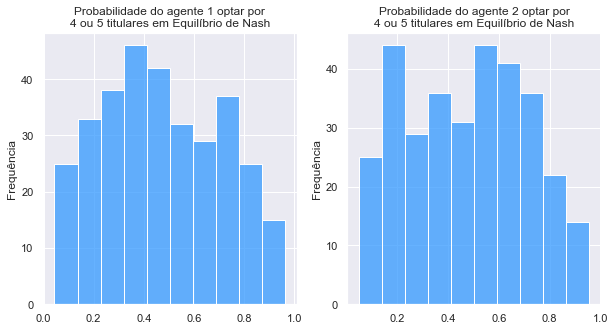

In [18]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
sns.histplot(data = xdf2, x = "nashpropj1aj45", kde = False, color = "#3399ff", bins = 10, ax = axs[0]).set(title = 'Probabilidade do agente 1 optar por\n4 ou 5 titulares em Equilíbrio de Nash', xlabel = '', ylabel = 'Frequência')
sns.histplot(data = xdf2, x = "nashpropj2aj45", kde = False, color = "#3399ff", bins = 10, ax = axs[1]).set(title = 'Probabilidade do agente 2 optar por\n4 ou 5 titulares em Equilíbrio de Nash', xlabel = '', ylabel = 'Frequência')
plt.show()

### Partidas com Equilíbrio de Nash em estratégias mistas nos Playoffs

Para as partidas dos *playoffs*, apesar de serem poucas, se nota que as estatísticas descritivas não são tão próximas para o agente 1 e o agente 2 ao jogar com **4 ou 5 titulares** como eram nas partidas da Temporada Regular. O pequeno número de 23 partidas prejudica, mas nota-se que os máximos e os mínimos não são tão altos como para as partidas da Temporada Regular.

In [19]:
xdf3 = xdf_nash[['GAME_ID', 'nashpropj1aj45' ,'nashpropj2aj45']][(xdf_nash['estrategia_pura'] == 0) & 
                                                                 (xdf_nash['SEASON_TYPE'] == "Playoffs")]

xdf3.describe()

,nashpropj1aj45,nashpropj2aj45
count,23.000000,23.000000
mean,0.487214,0.443891
std,0.183613,0.220613
min,0.153846,0.035714
25%,0.357494,0.258333
50%,0.500000,0.442308
75%,0.589286,0.615385
max,0.880000,0.842105


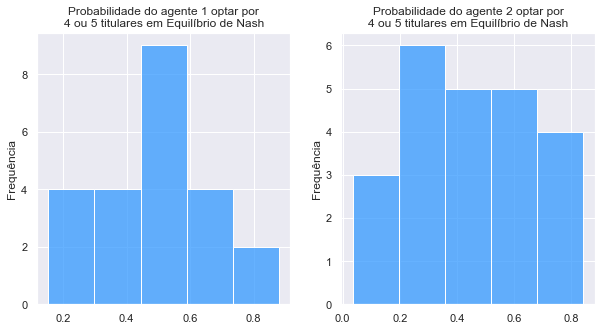

In [20]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
sns.histplot(data = xdf3, x = "nashpropj1aj45", kde = False, color = "#3399ff", bins = 5, ax = axs[0]).set(title = 'Probabilidade do agente 1 optar por\n4 ou 5 titulares em Equilíbrio de Nash', xlabel = '', ylabel = 'Frequência')
sns.histplot(data = xdf3, x = "nashpropj2aj45", kde = False, color = "#3399ff", bins = 5, ax = axs[1]).set(title = 'Probabilidade do agente 2 optar por\n4 ou 5 titulares em Equilíbrio de Nash', xlabel = '', ylabel = 'Frequência')
plt.show()

### Partidas com probabilidades extremas em Equilíbrio de Nash em estratégias mistas

Quais foram as partidas que levaram as maiores probabilidades do jogador 1 (equipe mandante) jogar a ação **4 ou 5 jogadores titulares**? É interessante analisar isso para conhecermos mais sobre os jogos de soma zero. Se para o jogador ficar indiferente entre as ações, é necessário colocar muita probabilidade em uma delas, isso significa que a outra é extremamente atrativa. Vamos investigar em quais partidas aconteceram esses equilíbrios em Estratégias mistas com probabilidades extremas:


#### Partidas com maiores probabilidades de ação 4 ou 5 titulares para o agente 1 em Equilíbrio de Nash

In [21]:
game_ids = list(xdf2.sort_values('nashpropj1aj45', ascending = False).iloc[0:5]['GAME_ID'])
jogos[(jogos['GAME_ID'].isin(game_ids))]

,GAME_ID,GAME_DATE,SEASON_TYPE,MATCHUP,HOME_TEAM,AWAY_TEAM,HOME_PTS,AWAY_PTS,nh,j3210,j45
82,0020800050,2008-11-04,Regular Season,DAL @ SAS,San Antonio Spurs,Dallas Mavericks,81,98,j3210,14,-20
83,0020800050,2008-11-04,Regular Season,DAL @ SAS,San Antonio Spurs,Dallas Mavericks,81,98,j45,-7,-4
480,0020800311,2008-12-09,Regular Season,MIL @ PHX,Phoenix Suns,Milwaukee Bucks,125,110,j3210,-3,7
481,0020800311,2008-12-09,Regular Season,MIL @ PHX,Phoenix Suns,Milwaukee Bucks,125,110,j45,6,5
1588,0020801007,2009-03-17,Regular Season,LAC @ GSW,Golden State Warriors,Los Angeles Clippers,127,120,j3210,-4,14
1589,0020801007,2009-03-17,Regular Season,LAC @ GSW,Golden State Warriors,Los Angeles Clippers,127,120,j45,-1,-2
1608,0020801019,2009-03-18,Regular Season,WAS @ LAC,Los Angeles Clippers,Washington Wizards,123,108,j3210,7,-5
1609,0020801019,2009-03-18,Regular Season,WAS @ LAC,Los Angeles Clippers,Washington Wizards,123,108,j45,6,7
1830,0020801152,2009-04-05,Regular Season,LAC @ LAL,Los Angeles Lakers,Los Angeles Clippers,88,85,j3210,13,-14
1831,0020801152,2009-04-05,Regular Season,LAC @ LAL,Los Angeles Lakers,Los Angeles Clippers,88,85,j45,0,1


In [22]:
xdf2[(xdf2['GAME_ID'].isin(game_ids))]

,GAME_ID,nashpropj1aj45,nashpropj2aj45
41,0020800050,0.918919,0.567568
240,0020800311,0.909091,0.818182
794,0020801007,0.947368,0.157895
804,0020801019,0.923077,0.076923
915,0020801152,0.964286,0.464286


Note que para chegar no Equilíbrio de Nash nesses 5 jogos, foi necessário o agente 1 jogar com alta probabilidade a ação com 4 ou mais titulares, ou seja, a equipe mandante tem bons payoffs para jogar a ação **3 ou menos jogadores titulares**, em 3 desses jogos o agente 1 tem um payoff alto nessa ação, mas em 2 deles dependendo do que o agente 2 fizer o prejuízo para o agente 1 pode ser grande. Note também que em 2 desses 5 jogos o Los Angeles Clippers está como visitante em partidas contra franquias também da Califórnia.

#### Partidas com maiores probabilidades de ação 3 ou menos titulares para o agente 1 em Equilíbrio de Nash

In [23]:
game_ids = list(xdf2.sort_values('nashpropj1aj45', ascending = True).iloc[0:5]['GAME_ID'])
jogos[(jogos['GAME_ID'].isin(game_ids))]

,GAME_ID,GAME_DATE,SEASON_TYPE,MATCHUP,HOME_TEAM,AWAY_TEAM,HOME_PTS,AWAY_PTS,nh,j3210,j45
610,0020800388,2008-12-19,Regular Season,CLE @ DEN,Denver Nuggets,Cleveland Cavaliers,88,105,j3210,-2,-1
611,0020800388,2008-12-19,Regular Season,CLE @ DEN,Denver Nuggets,Cleveland Cavaliers,88,105,j45,2,-16
710,0020800452,2008-12-29,Regular Season,CHI @ NJN,New Jersey Nets,Chicago Bulls,87,100,j3210,0,-1
711,0020800452,2008-12-29,Regular Season,CHI @ NJN,New Jersey Nets,Chicago Bulls,87,100,j45,-16,4
1288,0020800816,2009-02-20,Regular Season,DEN @ CHI,Chicago Bulls,Denver Nuggets,116,99,j3210,2,3
1289,0020800816,2009-02-20,Regular Season,DEN @ CHI,Chicago Bulls,Denver Nuggets,116,99,j45,17,-5
1676,0020801063,2009-03-25,Regular Season,MIL @ TOR,Toronto Raptors,Milwaukee Bucks,115,106,j3210,4,3
1677,0020801063,2009-03-25,Regular Season,MIL @ TOR,Toronto Raptors,Milwaukee Bucks,115,106,j45,-8,10
1708,0020801084,2009-03-28,Regular Season,NYK @ CHA,Charlotte Bobcats,New York Knicks,96,85,j3210,1,0
1709,0020801084,2009-03-28,Regular Season,NYK @ CHA,Charlotte Bobcats,New York Knicks,96,85,j45,-4,14


In [24]:
xdf2[(xdf2['GAME_ID'].isin(game_ids))]

,GAME_ID,nashpropj1aj45,nashpropj2aj45
305,0020800388,0.052632,0.210526
355,0020800452,0.047619,0.761905
644,0020800816,0.043478,0.652174
838,0020801063,0.052632,0.631579
854,0020801084,0.052632,0.263158


Já nas partidas que para chegar no Equilíbrio de Nash o agente 1 precisa ter uma probabilidade enorme para jogar a ação **3 ou menos jogadores titulares** então há algo de vantajoso na ação **4 ou 5 jogadores** para a equipe mandante (agente 1) em 3 delas, o agente 1 tem um valor exorbitante nessa linha e nas outras 2 partidas, só nessa linha que existe um payoff favorável ao agente 1.

#### Partidas com maiores probabilidades de ação 4 ou 5 titulares para o agente 2 em Equilíbrio de Nash

Verificando isso para as equipes visitantes (agente 2):

In [25]:
game_ids = list(xdf2.sort_values('nashpropj2aj45', ascending = False).iloc[0:5]['GAME_ID'])
jogos[(jogos['GAME_ID'].isin(game_ids))]

,GAME_ID,GAME_DATE,SEASON_TYPE,MATCHUP,HOME_TEAM,AWAY_TEAM,HOME_PTS,AWAY_PTS,nh,j3210,j45
144,0020800093,2008-11-10,Regular Season,OKC @ IND,Indiana Pacers,Oklahoma City Thunder,107,99,j3210,-8,5
145,0020800093,2008-11-10,Regular Season,OKC @ IND,Indiana Pacers,Oklahoma City Thunder,107,99,j45,7,4
248,0020800159,2008-11-19,Regular Season,WAS @ ATL,Atlanta Hawks,Washington Wizards,91,87,j3210,-8,0
249,0020800159,2008-11-19,Regular Season,WAS @ ATL,Atlanta Hawks,Washington Wizards,91,87,j45,13,-1
420,0020800270,2008-12-03,Regular Season,CHI @ MIL,Milwaukee Bucks,Chicago Bulls,97,90,j3210,10,1
421,0020800270,2008-12-03,Regular Season,CHI @ MIL,Milwaukee Bucks,Chicago Bulls,97,90,j45,-6,2
944,0020800608,2009-01-19,Regular Season,WAS @ GSW,Golden State Warriors,Washington Wizards,119,98,j3210,12,5
945,0020800608,2009-01-19,Regular Season,WAS @ GSW,Golden State Warriors,Washington Wizards,119,98,j45,-2,6
990,0020800637,2009-01-23,Regular Season,NJN @ SAS,San Antonio Spurs,New Jersey Nets,94,91,j3210,-11,2
991,0020800637,2009-01-23,Regular Season,NJN @ SAS,San Antonio Spurs,New Jersey Nets,94,91,j45,11,1


In [26]:
xdf2[(xdf2['GAME_ID'].isin(game_ids))]

,GAME_ID,nashpropj1aj45,nashpropj2aj45
72,0020800093,0.812500,0.937500
124,0020800159,0.363636,0.954545
210,0020800270,0.529412,0.941176
472,0020800608,0.466667,0.933333
495,0020800637,0.565217,0.956522


Para alcançar o Equilíbrio de Nash o agente 2 precisa de uma estratégia mista com alta probabilidade na ação **4 ou 5 titulares**, portanto existe algum incentivo grande na ação **3 jogadores ou menos**. Em 4 desses jogos, podemos ver 
que o único payoff favorável ao jogador 2 (valor negativo) está na coluna **j3210**. Coincidência ou não, nessas 5 partidas o visitante perdeu e em duas delas o Washington Wizards estava em quadra como visitante.

#### Partidas com maiores probabilidades de ação 3 ou menos titulares para o agente 2 em Equilíbrio de Nash

In [27]:
game_ids = list(xdf2.sort_values('nashpropj2aj45', ascending = True).iloc[0:5]['GAME_ID'])
jogos[(jogos['GAME_ID'].isin(game_ids))]

,GAME_ID,GAME_DATE,SEASON_TYPE,MATCHUP,HOME_TEAM,AWAY_TEAM,HOME_PTS,AWAY_PTS,nh,j3210,j45
318,0020800203,2008-11-24,Regular Season,SAC @ POR,Portland Trail Blazers,Sacramento Kings,91,90,j3210,1,17
319,0020800203,2008-11-24,Regular Season,SAC @ POR,Portland Trail Blazers,Sacramento Kings,91,90,j45,3,-20
400,0020800255,2008-12-02,Regular Season,LAL @ IND,Indiana Pacers,Los Angeles Lakers,118,117,j3210,-1,-7
401,0020800255,2008-12-02,Regular Season,LAL @ IND,Indiana Pacers,Los Angeles Lakers,118,117,j45,-2,11
1412,0020800898,2009-03-03,Regular Season,PHX @ ORL,Orlando Magic,Phoenix Suns,111,99,j3210,4,-16
1413,0020800898,2009-03-03,Regular Season,PHX @ ORL,Orlando Magic,Phoenix Suns,111,99,j45,2,22
1582,0020801004,2009-03-17,Regular Season,DET @ DAL,Dallas Mavericks,Detroit Pistons,103,101,j3210,1,-8
1583,0020801004,2009-03-17,Regular Season,DET @ DAL,Dallas Mavericks,Detroit Pistons,103,101,j45,0,9
1822,0020801148,2009-04-05,Regular Season,UTA @ NOH,New Orleans Hornets,Utah Jazz,94,108,j3210,-4,-12
1823,0020801148,2009-04-05,Regular Season,UTA @ NOH,New Orleans Hornets,Utah Jazz,94,108,j45,-5,1


In [28]:
xdf2[(xdf2['GAME_ID'].isin(game_ids))]

,GAME_ID,nashpropj1aj45,nashpropj2aj45
159,0020800203,0.410256,0.051282
200,0020800255,0.315789,0.052632
706,0020800898,0.500000,0.050000
791,0020801004,0.500000,0.055556
911,0020801148,0.571429,0.071429


Nas partidas em que o agente 2 precisa de uma probabilidade muito alta para jogar a ação **3 ou menos jogadores titulares** para chegar no Equilíbrio de Nash, então para esse agente existe um payoff grande para lançar a ação **j45**, ou seja, um valor negativo que favorece ao agente 2 mas o curioso é que quase sempre existe uma recompensa muito positiva para o agente 1 associada a ação **4 ou 5 titulares** para o agente 2.

### Diferenças entre as probabilidades em estratégias mistas e a proporção de tempo em que as ações foram usadas pelos agentes

O objetivo vai ser investigar o que aconteceu em partidas que essa diferença é pequena e o que acontecem em partidas que essa diferença é grande.

Essa diferença será medida em valor absoluto e representa a proporção de tempo em que as equipes usaram determinada ação (as vezes chamado aqui de observado) subtraído da proporção de tempo que deveríam ter usado cada ação para encontrar o Equilíbrio de Nash (as vezes chamado aqui de esperado).


In [29]:
colunas_resultado = ['GAME_ID','SEASON_TYPE', 'nashpropj1aj3210', 'nashpropj1aj45', 
                     'nashpropj2aj3210', 'nashpropj2aj45', 'obspropj1aj3210', 
                     'obspropj1aj45', 'obspropj2aj3210', 'obspropj2aj45', 'estrategia_pura']

xdf4 = xdf_nash[~(xdf_nash['GAME_ID'].isin(jogos_degenerados))][colunas_resultado]

xdf4['dif_j1aj3210'] = abs(xdf4['nashpropj1aj3210'] - xdf4['obspropj1aj3210'])
xdf4['dif_j1aj45'] = abs(xdf4['nashpropj1aj45'] - xdf4['obspropj1aj45'])
xdf4['dif_j2aj3210'] = abs(xdf4['nashpropj2aj3210'] - xdf4['obspropj2aj3210'])
xdf4['dif_j2aj45'] = abs(xdf4['nashpropj2aj45'] - xdf4['obspropj2aj45'])
xdf4['dif_j1'] = xdf4['dif_j1aj3210'] + xdf4['dif_j1aj45']
xdf4['dif_j2'] = xdf4['dif_j2aj3210'] + xdf4['dif_j2aj45']
xdf4['dif'] = xdf4['dif_j1'] + xdf4['dif_j2']

xdf4.describe()

,nashpropj1aj3210,nashpropj1aj45,nashpropj2aj3210,nashpropj2aj45,obspropj1aj3210,obspropj1aj45,obspropj2aj3210,obspropj2aj45,dif_j1aj3210,dif_j1aj45,dif_j2aj3210,dif_j2aj45,dif_j1,dif_j2,dif
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,0.491674,0.508326,0.490148,0.509852,0.490777,0.509223,0.491735,0.508265,0.396993,0.396993,0.404882,0.404882,0.793986,0.809763,1.603749
std,0.427587,0.427587,0.427754,0.427754,0.109856,0.109856,0.113916,0.113916,0.177035,0.177035,0.179156,0.179156,0.354071,0.358312,0.603631
min,0.000000,0.000000,0.000000,0.000000,0.102083,0.142014,0.165972,0.186111,0.000442,0.000442,0.001091,0.001091,0.000884,0.002183,0.120139
25%,0.000000,0.000000,0.000000,0.000000,0.411892,0.431510,0.410764,0.429774,0.290680,0.290680,0.301896,0.301896,0.581360,0.603793,1.154334
50%,0.500000,0.500000,0.461538,0.538462,0.492882,0.507118,0.488542,0.511458,0.425521,0.425521,0.428522,0.428522,0.851042,0.857044,1.782292
75%,1.000000,1.000000,1.000000,1.000000,0.568490,0.588108,0.570226,0.589236,0.526128,0.526128,0.536198,0.536198,1.052257,1.072396,2.043229
max,1.000000,1.000000,1.000000,1.000000,0.857986,0.897917,0.813889,0.834028,0.897917,0.897917,0.834028,0.834028,1.795833,1.668056,3.004861


As 10 partidas com menores diferenças absolutas entre a proporção de tempo em quadra dos estados e a probabilidade das ações em Equilíbrio de Nash em estratégias mistas são:

(Diferenças entre 0,12 e 0,2)

In [30]:
xdf4.sort_values('dif', ascending = True).iloc[0:10]

,GAME_ID,SEASON_TYPE,nashpropj1aj3210,nashpropj1aj45,nashpropj2aj3210,nashpropj2aj45,obspropj1aj3210,obspropj1aj45,obspropj2aj3210,obspropj2aj45,estrategia_pura,dif_j1aj3210,dif_j1aj45,dif_j2aj3210,dif_j2aj45,dif_j1,dif_j2,dif
987,0040800124,Playoffs,0.333333,0.666667,0.266667,0.733333,0.360069,0.639931,0.300000,0.700000,False,0.026736,0.026736,0.033333,0.033333,0.053472,0.066667,0.120139
459,0020800595,Regular Season,0.363636,0.636364,0.545455,0.454545,0.363194,0.636806,0.484722,0.515278,False,0.000442,0.000442,0.060732,0.060732,0.000884,0.121465,0.122348
941,0020801183,Regular Season,0.428571,0.571429,0.285714,0.714286,0.459722,0.540278,0.325694,0.674306,False,0.031151,0.031151,0.039980,0.039980,0.062302,0.079960,0.142262
596,0020800759,Regular Season,0.555556,0.444444,0.388889,0.611111,0.485764,0.514236,0.384028,0.615972,False,0.069792,0.069792,0.004861,0.004861,0.139583,0.009722,0.149306
869,0020801100,Regular Season,0.583333,0.416667,0.333333,0.666667,0.606944,0.393056,0.388542,0.611458,False,0.023611,0.023611,0.055208,0.055208,0.047222,0.110417,0.157639
537,0020800689,Regular Season,0.409091,0.590909,0.545455,0.454545,0.490972,0.509028,0.552083,0.447917,False,0.081881,0.081881,0.006629,0.006629,0.163763,0.013258,0.177020
218,0020800280,Regular Season,0.600000,0.400000,0.600000,0.400000,0.529167,0.470833,0.617708,0.382292,False,0.070833,0.070833,0.017708,0.017708,0.141667,0.035417,0.177083
71,0020800091,Regular Season,0.533333,0.466667,0.466667,0.533333,0.512847,0.487153,0.540625,0.459375,False,0.020486,0.020486,0.073958,0.073958,0.040972,0.147917,0.188889
112,0020800140,Regular Season,0.333333,0.666667,0.476190,0.523810,0.397569,0.602431,0.440972,0.559028,False,0.064236,0.064236,0.035218,0.035218,0.128472,0.070437,0.198909
425,0020800550,Regular Season,0.444444,0.555556,0.666667,0.333333,0.528819,0.471181,0.684375,0.315625,False,0.084375,0.084375,0.017708,0.017708,0.168750,0.035417,0.204167


Esses jogos são:

In [31]:
game_ids = xdf4.sort_values('dif', ascending = True).iloc[0:10]['GAME_ID']
jogos[(jogos['GAME_ID'].isin(game_ids))]

,GAME_ID,GAME_DATE,SEASON_TYPE,MATCHUP,HOME_TEAM,AWAY_TEAM,HOME_PTS,AWAY_PTS,nh,j3210,j45
142,0020800091,2008-11-09,Regular Season,GSW @ SAC,Sacramento Kings,Golden State Warriors,115,98,j3210,8,1
143,0020800091,2008-11-09,Regular Season,GSW @ SAC,Sacramento Kings,Golden State Warriors,115,98,j45,0,8
224,0020800140,2008-11-16,Regular Season,MIA @ TOR,Toronto Raptors,Miami Heat,107,96,j3210,10,-4
225,0020800140,2008-11-16,Regular Season,MIA @ TOR,Toronto Raptors,Miami Heat,107,96,j45,-1,6
436,0020800280,2008-12-05,Regular Season,MIN @ NJN,New Jersey Nets,Minnesota Timberwolves,113,84,j3210,11,1
437,0020800280,2008-12-05,Regular Season,MIN @ NJN,New Jersey Nets,Minnesota Timberwolves,113,84,j45,1,16
850,0020800550,2009-01-11,Regular Season,IND @ GSW,Golden State Warriors,Indiana Pacers,120,117,j3210,-1,4
851,0020800550,2009-01-11,Regular Season,IND @ GSW,Golden State Warriors,Indiana Pacers,120,117,j45,2,-2
918,0020800595,2009-01-17,Regular Season,MIA @ HOU,Houston Rockets,Miami Heat,93,86,j3210,5,-2
919,0020800595,2009-01-17,Regular Season,MIA @ HOU,Houston Rockets,Miami Heat,93,86,j45,0,4


Note que interessante. Obviamente o Equilíbrio de Nash nesses jogos é em estratégia mista. Em 3 dos 10 jogos a matriz é toda favorável para a equipe da casa. Em 6 partidas (5 vitórias de mandante e 1 de visitante) a diagonal principal é muito interessante para a equipe vencedora, ou seja, se manter na mesma estratégia que o adversário foi interessante para gerar pontos, nas outras 4 partidas (2 vitórias de mandante e 2 de visitante) se manter numa estratégia diferente do adversário foi melhor. Para as equipes note que o Miami Heat aparece duas vezes perdendo enquanto o Golden State Warriors aparece duas vezes vencendo.

As maiores diferenças entre a proporção de tempo jogado por cada estratégia e a probabilidade das ações em Equilíbrio de Nash são:

(Diferenças entre 2,62 e 3)

In [32]:
xdf4.sort_values('dif', ascending = False).iloc[0:10]

,GAME_ID,SEASON_TYPE,nashpropj1aj3210,nashpropj1aj45,nashpropj2aj3210,nashpropj2aj45,obspropj1aj3210,obspropj1aj45,obspropj2aj3210,obspropj2aj45,estrategia_pura,dif_j1aj3210,dif_j1aj45,dif_j2aj3210,dif_j2aj45,dif_j1,dif_j2,dif
982,0040800116,Playoffs,1.0,0.0,1.0,0.0,0.322917,0.677083,0.174653,0.825347,True,0.677083,0.677083,0.825347,0.825347,1.354167,1.650694,3.004861
797,0020801010,Regular Season,1.0,0.0,1.0,0.0,0.332292,0.667708,0.187847,0.812153,True,0.667708,0.667708,0.812153,0.812153,1.335417,1.624306,2.959722
965,0020801219,Regular Season,0.0,1.0,0.0,1.0,0.767361,0.232639,0.637500,0.362500,True,0.767361,0.767361,0.637500,0.637500,1.534722,1.275000,2.809722
139,0020800179,Regular Season,0.0,1.0,0.0,1.0,0.646181,0.353819,0.744792,0.255208,True,0.646181,0.646181,0.744792,0.744792,1.292361,1.489583,2.781944
1046,0040800403,Playoffs,1.0,0.0,1.0,0.0,0.355208,0.644792,0.272222,0.727778,True,0.644792,0.644792,0.727778,0.727778,1.289583,1.455556,2.745139
123,0020800157,Regular Season,1.0,0.0,0.0,1.0,0.366319,0.633681,0.712153,0.287847,True,0.633681,0.633681,0.712153,0.712153,1.267361,1.424306,2.691667
914,0020801151,Regular Season,0.0,1.0,1.0,0.0,0.503125,0.496875,0.165972,0.834028,True,0.503125,0.503125,0.834028,0.834028,1.006250,1.668056,2.674306
552,0020800707,Regular Season,0.0,1.0,1.0,0.0,0.605556,0.394444,0.284375,0.715625,True,0.605556,0.605556,0.715625,0.715625,1.211111,1.431250,2.642361
346,0020800442,Regular Season,0.0,1.0,1.0,0.0,0.704861,0.295139,0.387153,0.612847,True,0.704861,0.704861,0.612847,0.612847,1.409722,1.225694,2.635417
406,0020800522,Regular Season,1.0,0.0,0.0,1.0,0.429167,0.570833,0.743056,0.256944,True,0.570833,0.570833,0.743056,0.743056,1.141667,1.486111,2.627778


Esses 10 jogos em que a diferença entre o tempo em quadra de cada uma das estratégias e os Equilíbrios de Nash foram:

In [33]:
game_ids = xdf4.sort_values('dif', ascending = False).iloc[0:10]['GAME_ID']
jogos[(jogos['GAME_ID'].isin(game_ids))]

,GAME_ID,GAME_DATE,SEASON_TYPE,MATCHUP,HOME_TEAM,AWAY_TEAM,HOME_PTS,AWAY_PTS,nh,j3210,j45
246,0020800157,2008-11-18,Regular Season,POR @ GSW,Golden State Warriors,Portland Trail Blazers,111,106,j3210,2,-1
247,0020800157,2008-11-18,Regular Season,POR @ GSW,Golden State Warriors,Portland Trail Blazers,111,106,j45,3,-2
278,0020800179,2008-11-21,Regular Season,UTA @ SAS,San Antonio Spurs,Utah Jazz,119,94,j3210,22,-3
279,0020800179,2008-11-21,Regular Season,UTA @ SAS,San Antonio Spurs,Utah Jazz,119,94,j45,8,-2
692,0020800442,2008-12-27,Regular Season,MEM @ SAS,San Antonio Spurs,Memphis Grizzlies,106,103,j3210,-2,-1
693,0020800442,2008-12-27,Regular Season,MEM @ SAS,San Antonio Spurs,Memphis Grizzlies,106,103,j45,1,2
812,0020800522,2009-01-07,Regular Season,IND @ PHX,Phoenix Suns,Indiana Pacers,110,113,j3210,8,-1
813,0020800522,2009-01-07,Regular Season,IND @ PHX,Phoenix Suns,Indiana Pacers,110,113,j45,4,-14
1104,0020800707,2009-02-02,Regular Season,MEM @ WAS,Washington Wizards,Memphis Grizzlies,97,113,j3210,-4,-19
1105,0020800707,2009-02-02,Regular Season,MEM @ WAS,Washington Wizards,Memphis Grizzlies,97,113,j45,0,7


Obviamente nos jogos em que as diferenças são maiores os equilíbrios de Nash são estratégias puras porque alguma das equipes possuía alguma estratégia dominada. Golden State Warriors e San Antonio Spurs aparecem duas vezes vencendo, enquando o Sacramento Kings aparece duas vezes nessas 10 partidas perdendo.

### Diferença entre o tempo esperado em Equilíbrio de Nash e o observado para as partidas da Temporada Regular e os Playoffs

Os histogramas abaixo mostram a diferença da proporção de tempo jogando com a ação 4 ou 5 jogadores titulares para os agentes 1 e 2 em partidas da Temporada Regular (em azul) e dos Playoffs (em vermelho) somente para jogos em que não houve estratégias dominadas, ou seja, o Equilíbrio de Nash não está em estratégias puras. Note que as diferenças entre o observado e o esperado são bem parecidas para o agente 1 e 2. A comparação entre Temporada Regular e Playoffs fica prejudicada porque há poucas partidas disponíveis para playoffs. Só será apresentado para a ação 4 ou 5 jogadores porque a proporção de tempo jogando o outro estado e a probabilidade do mesmo é a mesma coisa.

Diferença entre as proporções da ação 4 ou 5 jogadores para os agentes 1 e 2 em partidas
da Temporada Regular (azul) e Playoffs (vermelho) somente para jogos sem estratégias dominadas


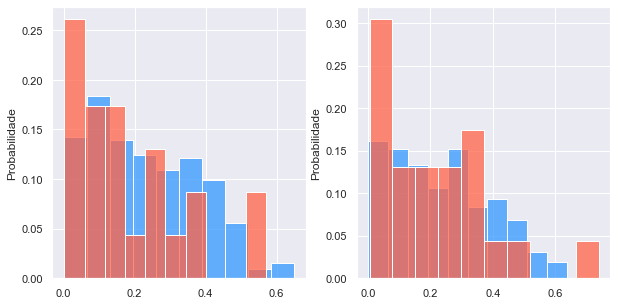

In [34]:
print("Diferença entre as proporções da ação 4 ou 5 jogadores para os agentes 1 e 2 em partidas\nda Temporada Regular (azul) e Playoffs (vermelho) somente para jogos sem estratégias dominadas")
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
sns.histplot(data = xdf4[(xdf4['estrategia_pura'] == 0) & (xdf4['SEASON_TYPE'] == 'Regular Season')], 
             x = "dif_j1aj45", stat = 'probability', kde = False, color = "#3399ff", bins = 10, 
             ax = axs[0]).set(title = '',xlabel = '', ylabel = 'Probabilidade')
sns.histplot(data = xdf4[(xdf4['estrategia_pura'] == 0) & (xdf4['SEASON_TYPE'] == 'Playoffs')], 
             x = "dif_j1aj45", stat = 'probability', kde = False, color = "tomato", bins = 10, 
             ax = axs[0]).set(title = '',xlabel = '', ylabel = 'Probabilidade')

sns.histplot(data = xdf4[(xdf4['estrategia_pura'] == 0) & (xdf4['SEASON_TYPE'] == 'Regular Season')], 
             x = "dif_j2aj45", stat = 'probability', kde = False, color = "#3399ff", bins = 10, 
             ax = axs[1]).set(title = '',xlabel = '', ylabel = 'Probabilidade')
sns.histplot(data = xdf4[(xdf4['estrategia_pura'] == 0) & (xdf4['SEASON_TYPE'] == 'Playoffs')], 
             x = "dif_j2aj45", stat = 'probability', kde = False, color = "tomato", bins = 10, 
             ax = axs[1]).set(title = '',xlabel = '', ylabel = 'Probabilidade')
plt.show()


Descrição das diferenças na ação 4 ou 5 jogadores para os agentes 1 e 2 na Temporada Regular em jogos sem Equilíbrio de Nash em estratégias puras:

In [35]:
xdf4[(xdf4['estrategia_pura'] == 0) & (xdf4['SEASON_TYPE'] == 'Regular Season')].describe()[['dif_j1aj45', 'dif_j2aj45']]

,dif_j1aj45,dif_j2aj45
count,322.000000,322.000000
mean,0.233059,0.236754
std,0.150699,0.154353
min,0.000442,0.001091
25%,0.100868,0.100242
50%,0.205011,0.228299
75%,0.357324,0.348205
max,0.649822,0.637847


Descrição das diferenças na ação 4 ou 5 jogadores para os agentes 1 e 2 nos Playoffs em jogos sem Equilíbrio de Nash em estratégias puras:

In [36]:
xdf4[(xdf4['estrategia_pura'] == 0) & (xdf4['SEASON_TYPE'] == 'Playoffs')].describe()[['dif_j1aj45', 'dif_j2aj45']]

,dif_j1aj45,dif_j2aj45
count,23.000000,23.000000
mean,0.178072,0.220396
std,0.164857,0.187036
min,0.002431,0.005853
25%,0.058988,0.054516
50%,0.122361,0.184829
75%,0.270698,0.335342
max,0.571368,0.739286


Note que interessante, em jogos dos Playoffs, a equipe mandante das partidas mantém em média a ação 4 ou 5 jogadores titulares em quadra em proporção mais próxima do equilíbrio de Nash do que fazem as equipes visitantes nos Playoffs e as equipes mandantes e visitantes na Temporada Regular. A amostra é muito pequena, mas o tamanho da diferença média é suficientemente grande para levantar uma suspeita. A diferença média entre observado e esperado para a ação 4 ou 5 jogadores titulares para as equipes mandantes em jogos sem Equilíbrio de Nash em estratégias puras nos Playoffs foi de 0,178 enquanto que a mesma ação para o mesmo universo de jogos para a equipe visitante nos playoffs foi de 0,22. Na temporada regular a diferença média foi de 0,233 e 0,236 para as equipes mandantes e visitantes jogando essa ação, respectivamente.

### A diferença entre o tempo esperado em Equilíbrio de Nash e o observado para as partidas sofre modificação ao longo da temporada?

Claramente o resultado encontrado acima fica sob suspeita pelo baixo número de jogos considerados, mas será que se dividirmos a temporada em quantidades iguais de jogos teremos um resultado de diferença entre esperado e observado menor em algum trecho? Vamos verificar. São 1048 jogos que temos disponíveis. Vamos dividir a temporada em 4 partes de 262 jogos e analisar a proporção de equilíbrios de Nash em estratégia pura, o percentual de jogos degenerados e a diferença entre observado de proporção em quadra das ações e o esperado em equilíbrio de Nash em jogos sem estratégias dominadas.

In [37]:
print("Quantidade de jogos degenerados na parte 1 da temporada: "+ str(xdf_nash.iloc[0:262][(xdf_nash.iloc[0:262]['degenerado'] == 1)].shape[0]))
print("Quantidade de jogos degenerados na parte 2 da temporada: "+ str(xdf_nash.iloc[262:524][(xdf_nash.iloc[262:524]['degenerado'] == 1)].shape[0]))
print("Quantidade de jogos degenerados na parte 3 da temporada: "+ str(xdf_nash.iloc[524:786][(xdf_nash.iloc[524:786]['degenerado'] == 1)].shape[0]))
print("Quantidade de jogos degenerados na parte 4 da temporada: "+ str(xdf_nash.iloc[786:1048][(xdf_nash.iloc[786:1048]['degenerado'] == 1)].shape[0]))

Quantidade de jogos degenerados na parte 1 da temporada: 13
Quantidade de jogos degenerados na parte 2 da temporada: 14
Quantidade de jogos degenerados na parte 3 da temporada: 13
Quantidade de jogos degenerados na parte 4 da temporada: 12


Note que parece não ter diferença significativa entre a quantidade de jogos degenerados em cada uma das 4 partes definidas por nós da temporada 2008/09 da NBA. Todas ficaram com números bem parecidos. 

Vamos checar se esse comportamento se repete para a quantidade de jogos com Equilíbrio de Nash em estratégias puras.

In [38]:
print("Quantidade de jogos com equilíbrio de Nash em estratégias puras na parte 1 da temporada: "+ str(xdf_nash.iloc[0:262][(xdf_nash.iloc[0:262]['estrategia_pura'] == 1) & (xdf_nash.iloc[0:262]['degenerado'] == 0)].shape[0]))
print("Quantidade de jogos com equilíbrio de Nash em estratégias puras na parte 2 da temporada: "+ str(xdf_nash.iloc[262:524][(xdf_nash.iloc[262:524]['estrategia_pura'] == 1) & (xdf_nash.iloc[262:524]['degenerado'] == 0)].shape[0]))
print("Quantidade de jogos com equilíbrio de Nash em estratégias puras na parte 3 da temporada: "+ str(xdf_nash.iloc[524:786][(xdf_nash.iloc[524:786]['estrategia_pura'] == 1) & (xdf_nash.iloc[524:786]['degenerado'] == 0)].shape[0]))
print("Quantidade de jogos com equilíbrio de Nash em estratégias puras na parte 4 da temporada: "+ str(xdf_nash.iloc[786:1048][(xdf_nash.iloc[786:1048]['estrategia_pura'] == 1) & (xdf_nash.iloc[786:1048]['degenerado'] == 0)].shape[0]))

Quantidade de jogos com equilíbrio de Nash em estratégias puras na parte 1 da temporada: 162
Quantidade de jogos com equilíbrio de Nash em estratégias puras na parte 2 da temporada: 165
Quantidade de jogos com equilíbrio de Nash em estratégias puras na parte 3 da temporada: 162
Quantidade de jogos com equilíbrio de Nash em estratégias puras na parte 4 da temporada: 162


A quantidade de jogos com equilíbrio de Nash em estratégias puras é bem parecida nas 4 partes da temporada. Cerca de 65% dos jogos em cada parte possuiu Equilíbrio de Nash em estratégias puras e não são jogos degenerados.

In [39]:
xdf5p1 = xdf_nash.iloc[0:262][(xdf_nash.iloc[0:262]['estrategia_pura'] == 0)]
xdf5p1['dif_j1aj45'] = abs(xdf5p1['nashpropj1aj45'] - xdf5p1['obspropj1aj45'])
xdf5p1['dif_j2aj45'] = abs(xdf5p1['nashpropj2aj45'] - xdf5p1['obspropj2aj45'])

xdf5p2 = xdf_nash.iloc[262:524][(xdf_nash.iloc[262:524]['estrategia_pura'] == 0)]
xdf5p2['dif_j1aj45'] = abs(xdf5p2['nashpropj1aj45'] - xdf5p2['obspropj1aj45'])
xdf5p2['dif_j2aj45'] = abs(xdf5p2['nashpropj2aj45'] - xdf5p2['obspropj2aj45'])

xdf5p3 = xdf_nash.iloc[524:786][(xdf_nash.iloc[524:786]['estrategia_pura'] == 0)]
xdf5p3['dif_j1aj45'] = abs(xdf5p3['nashpropj1aj45'] - xdf5p3['obspropj1aj45'])
xdf5p3['dif_j2aj45'] = abs(xdf5p3['nashpropj2aj45'] - xdf5p3['obspropj2aj45'])

xdf5p4 = xdf_nash.iloc[786:1048][(xdf_nash.iloc[786:1048]['estrategia_pura'] == 0)]
xdf5p4['dif_j1aj45'] = abs(xdf5p4['nashpropj1aj45'] - xdf5p4['obspropj1aj45'])
xdf5p4['dif_j2aj45'] = abs(xdf5p4['nashpropj2aj45'] - xdf5p4['obspropj2aj45'])

As estatísticas descritivas das diferenças entre observado e esperado da proporção de tempo em quadra da ação 4 ou 5 titulares para as equipes mandantes (Agente 1) em cada uma das partes da temporada (apresentadas como 1, 2, 3 e 4 em sequência) em jogos sem estratégias dominadas (sem Equilíbrio de Nash em estratégias puras) estão exibidas abaixo:

In [40]:
pd.concat([xdf5p1[['dif_j1aj45']].describe(), xdf5p2[['dif_j1aj45']].describe(), 
           xdf5p3[['dif_j1aj45']].describe(), xdf5p4[['dif_j1aj45']].describe()], axis = 1)

,dif_j1aj45,dif_j1aj45,dif_j1aj45,dif_j1aj45
count,87.000000,83.000000,87.000000,88.000000
mean,0.214383,0.233435,0.244165,0.225816
std,0.144125,0.151952,0.145164,0.166773
min,0.002395,0.000442,0.006154,0.002431
25%,0.082513,0.100748,0.122693,0.083333
50%,0.186111,0.222569,0.229968,0.180903
75%,0.341030,0.360640,0.362326,0.326243
max,0.649822,0.602778,0.590897,0.642855


Note que a primeira e a última parte da temporada aparentam ter valores de diferenças menores em média, mas principalmente em mediana. As estatísticas descritivas das diferenças entre observado e esperado da proporção de tempo em quadra da ação 4 ou 5 titulares para as equipes visitantes (Agente 2) em cada uma das partes da temporada (apresentadas como 1, 2, 3 e 4 em sequência) em jogos sem estratégias dominadas (sem Equilíbrio de Nash em estratégias puras) estão exibidas abaixo:

In [41]:
pd.concat([xdf5p1[['dif_j2aj45']].describe(), xdf5p2[['dif_j2aj45']].describe(), 
           xdf5p3[['dif_j2aj45']].describe(), xdf5p4[['dif_j2aj45']].describe()], axis = 1)

,dif_j2aj45,dif_j2aj45,dif_j2aj45,dif_j2aj45
count,87.000000,83.000000,87.000000,88.000000
mean,0.274306,0.225726,0.209499,0.232701
std,0.157832,0.157915,0.149248,0.156170
min,0.006250,0.002827,0.001091,0.005853
25%,0.150647,0.080609,0.080848,0.097786
50%,0.282818,0.213958,0.195486,0.217943
75%,0.405390,0.324549,0.315199,0.351004
max,0.625204,0.584722,0.637847,0.739286


Note que na primeira parte da temporada essa diferença é relevantemente maior que nas outras partes. Se compararmos as diferenças médias para as equipes mandantes e visitantes em cada uma das partes, notaremos que na primeira parte a diferença média entre mandantes e visitantes parece ser significativas, ou seja, no início da temporada as equipes mandantes parecem jogar as formações titulares mais próximos da proporção esperada em equilíbrio de Nash que as equipes visitantes.

### Ordenação das equipes por seus resultados em Equilíbrio de Nash nas matrizes de payoff

Nessa última parte das análises será investigado se as equipes possuíram alguma tendência de acumular equilíbrio de Nash em estratégias puras ou não. Não será feita distinção entre jogos como mandante e visitante.

In [42]:
xdf_nash['dif1'] = abs(xdf_nash['nashpropj1aj45'] - xdf_nash['obspropj1aj45'])
xdf_nash['dif2'] = abs(xdf_nash['nashpropj2aj45'] - xdf_nash['obspropj2aj45'])
xdf_nash['vit'] = (xdf_nash['HOME_PTS'] > xdf_nash['AWAY_PTS'])

In [43]:
pd.DataFrame(xdf_nash.groupby('HOME_TEAM').size(), columns = ['HOME_MATCHS']).reset_index().\
rename({'HOME_TEAM': 'TEAM'}, axis = 1)

xdf_man = pd.concat([xdf_nash.groupby('HOME_TEAM').size(),
                     xdf_nash[(xdf_nash['estrategia_pura'] == 1)].groupby('HOME_TEAM').size(),
                     xdf_nash[(xdf_nash['estrategia_pura'] == 0)].groupby('HOME_TEAM').size(),
                     xdf_nash[(xdf_nash['estrategia_pura'] == 0)].groupby('HOME_TEAM')['obspropj1aj45'].mean(),
                     xdf_nash[(xdf_nash['estrategia_pura'] == 0)].groupby('HOME_TEAM')['nashpropj1aj45'].mean(),
                     xdf_nash[(xdf_nash['estrategia_pura'] == 0)].groupby('HOME_TEAM')['dif1'].describe()[['mean', 'std']],
                     xdf_nash[(xdf_nash['estrategia_pura'] == 1)].groupby('HOME_TEAM')['vit'].sum(),
                     xdf_nash[(xdf_nash['estrategia_pura'] == 0)].groupby('HOME_TEAM')['vit'].sum(),
                     xdf_nash.groupby('HOME_TEAM')['vit'].sum()], axis = 1).reset_index()

xdf_man.columns = ['TEAM', 'QTD_JOGOS_MAN', 'NE_EP_MAN', 'NE_EM_MAN', 'PROP_OBS_J45_MAN', 'PROP_NASH_J45_MAN', 'DIF_MEAN_MAN', 
                   'DIF_STD_MAN', 'VIT_EP_MAN', 'VIT_EM_MAN', 'VIT_MAN']

xdf_vis = pd.concat([xdf_nash.groupby('AWAY_TEAM').size(),
                     xdf_nash[(xdf_nash['estrategia_pura'] == 1)].groupby('AWAY_TEAM').size(),
                     xdf_nash[(xdf_nash['estrategia_pura'] == 0)].groupby('AWAY_TEAM').size(),
                     xdf_nash[(xdf_nash['estrategia_pura'] == 0)].groupby('AWAY_TEAM')['obspropj2aj45'].mean(),
                     xdf_nash[(xdf_nash['estrategia_pura'] == 0)].groupby('AWAY_TEAM')['nashpropj2aj45'].mean(),
                     xdf_nash[(xdf_nash['estrategia_pura'] == 0)].groupby('AWAY_TEAM')['dif2'].describe()[['mean', 'std']],
                     xdf_nash[(xdf_nash['estrategia_pura'] == 1)].groupby('AWAY_TEAM')['vit'].sum(),
                     xdf_nash[(xdf_nash['estrategia_pura'] == 0)].groupby('AWAY_TEAM')['vit'].sum(),
                     xdf_nash.groupby('AWAY_TEAM')['vit'].sum()], axis = 1).reset_index()
xdf_vis.columns = ['TEAM', 'QTD_JOGOS_VIS', 'NE_EP_VIS', 'NE_EM_VIS', 'PROP_OBS_J45_VIS', 'PROP_NASH_J45_VIS', 'DIF_MEAN_VIS', 
                   'DIF_STD_VIS', 'DER_EP_VIS', 'DER_EM_VIS', 'DER_VIS']

xdf_times = xdf_man.merge(xdf_vis, left_on = 'TEAM', right_on = 'TEAM')
xdf_times['QTD_JOGOS'] = xdf_times['QTD_JOGOS_MAN'] + xdf_times['QTD_JOGOS_VIS'] 
xdf_times['QTD_NE_EP'] = xdf_times['NE_EP_MAN'] + xdf_times['NE_EP_VIS'] 
xdf_times['QTD_NE_EM'] = xdf_times['NE_EM_MAN'] + xdf_times['NE_EM_VIS'] 
xdf_times['PROP_OBS_J45'] = xdf_times['NE_EM_MAN']*xdf_times['PROP_OBS_J45_MAN'] + xdf_times['NE_EM_VIS']*xdf_times['PROP_OBS_J45_VIS']
xdf_times['PROP_OBS_J45'] = xdf_times['PROP_OBS_J45']/xdf_times['QTD_NE_EM']
xdf_times['PROP_NASH_J45'] = xdf_times['NE_EM_MAN']*xdf_times['PROP_NASH_J45_MAN'] + xdf_times['NE_EM_VIS']*xdf_times['PROP_NASH_J45_VIS']
xdf_times['PROP_NASH_J45'] = xdf_times['PROP_NASH_J45']/xdf_times['QTD_NE_EM']
xdf_times['DIF_MEDIA'] = xdf_times['NE_EM_MAN']*xdf_times['DIF_MEAN_MAN'] + xdf_times['NE_EM_VIS']*xdf_times['DIF_MEAN_VIS']
xdf_times['DIF_MEDIA'] = xdf_times['DIF_MEDIA']/xdf_times['QTD_NE_EM']
xdf_times['QTD_VITORIAS_EP'] = xdf_times['VIT_EP_MAN'] + xdf_times['NE_EP_VIS'] - xdf_times['DER_EP_VIS'] 
xdf_times['QTD_VITORIAS_EM'] = xdf_times['VIT_EM_MAN'] + xdf_times['NE_EM_VIS'] - xdf_times['DER_EM_VIS']
xdf_times['QTD_VITORIAS'] = xdf_times['VIT_MAN'] + xdf_times['QTD_JOGOS_VIS'] - xdf_times['DER_VIS']
xdf_times['PROP_VITORIAS'] = xdf_times['QTD_VITORIAS']/xdf_times['QTD_JOGOS']
xdf_times['PROP_VITORIAS_NE_EP'] = xdf_times['QTD_VITORIAS_EP']/xdf_times['QTD_NE_EP']
xdf_times['PROP_VITORIAS_NE_EM'] = xdf_times['QTD_VITORIAS_EM']/xdf_times['QTD_NE_EM']


As quantidades de jogos, vitórias, quantidade e vitórias em partidas em que a matriz de payoff teve equilíbrio de Nash em estratégias puras e quantidade e vitórias em partidas em que a matriz de payoff teve equilíbrio de Nash em estratégias mistas, 

In [44]:
xdf_times[['TEAM', 'QTD_JOGOS', 'QTD_VITORIAS', 'QTD_NE_EP', 'QTD_VITORIAS_EP', 'QTD_NE_EM', 'QTD_VITORIAS_EM']].\
sort_values(['QTD_VITORIAS'], ascending = False)

,TEAM,QTD_JOGOS,QTD_VITORIAS,QTD_NE_EP,QTD_VITORIAS_EP,QTD_NE_EM,QTD_VITORIAS_EM
4,Cleveland Cavaliers,83,66,55,43,28,23
1,Boston Celtics,76,55,49,34,27,21
6,Denver Nuggets,81,54,53,35,28,19
12,Los Angeles Lakers,73,53,49,36,24,17
21,Orlando Magic,80,51,53,32,27,19
24,Portland Trail Blazers,72,46,49,30,23,16
9,Houston Rockets,72,45,52,34,20,11
26,San Antonio Spurs,74,44,51,34,23,10
0,Atlanta Hawks,82,43,52,26,30,17
5,Dallas Mavericks,68,43,46,29,22,14


Como as equipes não possuem números iguais de jogos, fica mais fácil comparar as proporções. Note que as equipes que venceram mais obviamente possuem mais proporção de vitórias em partidas em que o Equilíbrio de Nash foi alcançado em estratégias puras e em partidas em que o equilíbrio de Nash foi encontrado em estratégias mistas. A diferença entre a proporção de tempo com a ação 4 ou 5 jogadores titulares e a probabilidade de usar essa ação em Equilíbrio de Nash em estratégiasa mistas não parece estar correlacionada com a proporção de vitórias das equipes.

In [45]:
xdf_times[['TEAM', 'PROP_VITORIAS', 'PROP_VITORIAS_NE_EP', 'PROP_VITORIAS_NE_EM','PROP_OBS_J45', 'PROP_NASH_J45', 'DIF_MEDIA']].\
sort_values(['PROP_VITORIAS'], ascending = False)

,TEAM,PROP_VITORIAS,PROP_VITORIAS_NE_EP,PROP_VITORIAS_NE_EM,PROP_OBS_J45,PROP_NASH_J45,DIF_MEDIA
4,Cleveland Cavaliers,0.795181,0.781818,0.821429,0.486694,0.441149,0.199599
12,Los Angeles Lakers,0.726027,0.734694,0.708333,0.505613,0.428021,0.213165
1,Boston Celtics,0.723684,0.693878,0.777778,0.596168,0.390363,0.286485
6,Denver Nuggets,0.666667,0.660377,0.678571,0.453361,0.531215,0.182315
24,Portland Trail Blazers,0.638889,0.612245,0.695652,0.440580,0.546631,0.187118
21,Orlando Magic,0.637500,0.603774,0.703704,0.529025,0.446154,0.201649
5,Dallas Mavericks,0.632353,0.630435,0.636364,0.444429,0.544755,0.246790
9,Houston Rockets,0.625000,0.653846,0.550000,0.557205,0.455749,0.278459
23,Phoenix Suns,0.611940,0.500000,0.758621,0.539727,0.452650,0.252748
26,San Antonio Spurs,0.594595,0.666667,0.434783,0.459345,0.556888,0.265178


As equipes estão ordenadas por diferença agora. Apesar de não se notar nenhuma relação entre a diferença média e a proporção de vitórias. Verificando somente os 10 com menores diferenças, 6 deles se classificaram para os Playoffs da NBA naquela temporada: Utah Jazz, Denver Nuggets, Portland Trail Blazers, Cleverland Cavaliers e Orlando Magic e Los Angeles Lakers que fizeram a NBA Finals de 2008/09.

Já nas 10 equipes com maior diferença entre o observado e o esperado. Somente 4 delas foram aos Playoffs: San Antonio Spurs, Houston Hockets, Boston Celtics e Atlanta Hawks. Claro a diferença não é tão grande e pode ser só uma aleatoriedade, mas desperta alguma curiosidade. 

In [46]:
xdf_times[['TEAM', 'PROP_VITORIAS', 'PROP_VITORIAS_NE_EP', 'PROP_VITORIAS_NE_EM','PROP_OBS_J45', 'PROP_NASH_J45', 'DIF_MEDIA']].\
sort_values(['DIF_MEDIA'], ascending = True)

,TEAM,PROP_VITORIAS,PROP_VITORIAS_NE_EP,PROP_VITORIAS_NE_EM,PROP_OBS_J45,PROP_NASH_J45,DIF_MEDIA
28,Utah Jazz,0.573770,0.534884,0.666667,0.477218,0.553901,0.157403
16,Minnesota Timberwolves,0.303030,0.291667,0.333333,0.483314,0.425214,0.157775
27,Toronto Raptors,0.384615,0.409091,0.333333,0.536045,0.465346,0.178476
6,Denver Nuggets,0.666667,0.660377,0.678571,0.453361,0.531215,0.182315
24,Portland Trail Blazers,0.638889,0.612245,0.695652,0.440580,0.546631,0.187118
10,Indiana Pacers,0.471429,0.500000,0.416667,0.468793,0.455106,0.197619
4,Cleveland Cavaliers,0.795181,0.781818,0.821429,0.486694,0.441149,0.199599
13,Memphis Grizzlies,0.271429,0.304348,0.208333,0.519763,0.414294,0.201377
21,Orlando Magic,0.637500,0.603774,0.703704,0.529025,0.446154,0.201649
12,Los Angeles Lakers,0.726027,0.734694,0.708333,0.505613,0.428021,0.213165


Abaixo a tabela ordenada por probabilidade média em Equilíbrio de Nash atribuída a ação 4 ou 5 jogadores para as equipes. Há um fenômeno interessante. Das 10 equipes com menores probabilidades médias nessa ação, 5 delas foram aos Playoffs: Boston Celtics, Los Angeles Lakers (campeão), Atlanta Hawks, Miami Heat e Cleverland Cavaliers. Já nos 10 com maiores probabilidades médias nessa ação, 7 delas foram aos Playoffs:  Denver Nuggets, Detroid Pistons, Dallas Mavericks, Portland Trail Blazers, Utah Jazz, Chicago Bulls e San Antonio Spurs. Não significa muita coisa, pode ser só uma aleatoriedade, até mesmo porque muitas equipes ruins também vão aos Playoffs da NBA, mas pode ser um fenômeno a ser investigado em trabalhos futuros.

In [47]:
xdf_times[['TEAM', 'PROP_VITORIAS', 'PROP_VITORIAS_NE_EP', 'PROP_VITORIAS_NE_EM','PROP_OBS_J45', 'PROP_NASH_J45', 'DIF_MEDIA']].\
sort_values(['PROP_NASH_J45'], ascending = True)

,TEAM,PROP_VITORIAS,PROP_VITORIAS_NE_EP,PROP_VITORIAS_NE_EM,PROP_OBS_J45,PROP_NASH_J45,DIF_MEDIA
25,Sacramento Kings,0.197183,0.215686,0.150000,0.487500,0.341647,0.258446
1,Boston Celtics,0.723684,0.693878,0.777778,0.596168,0.390363,0.286485
2,Charlotte Bobcats,0.448276,0.413043,0.583333,0.591522,0.401579,0.240973
13,Memphis Grizzlies,0.271429,0.304348,0.208333,0.519763,0.414294,0.201377
16,Minnesota Timberwolves,0.303030,0.291667,0.333333,0.483314,0.425214,0.157775
12,Los Angeles Lakers,0.726027,0.734694,0.708333,0.505613,0.428021,0.213165
0,Atlanta Hawks,0.524390,0.500000,0.566667,0.591759,0.428186,0.287730
14,Miami Heat,0.521739,0.604167,0.333333,0.534011,0.430597,0.229132
4,Cleveland Cavaliers,0.795181,0.781818,0.821429,0.486694,0.441149,0.199599
19,New York Knicks,0.414286,0.448980,0.333333,0.538955,0.443074,0.301473


A matriz de correlação entre as variáveis de proporção estão expostas abaixo. Note que não se nota nenhuma grande correlação entre as proporções de vitórias e a proporção média de tempo em quadra da formação com 4 ou 5 titulares e nem com a proporção média de tempo em Nash que essa ação deveria ser usada.

In [48]:
xdf_props = xdf_times[['TEAM', 'PROP_VITORIAS', 'PROP_VITORIAS_NE_EP', 'PROP_VITORIAS_NE_EM','PROP_OBS_J45', 'PROP_NASH_J45', 'DIF_MEDIA']]
xdf_props.corr()

,PROP_VITORIAS,PROP_VITORIAS_NE_EP,PROP_VITORIAS_NE_EM,PROP_OBS_J45,PROP_NASH_J45,DIF_MEDIA
PROP_VITORIAS,1.000000,0.954917,0.869937,0.111216,0.138423,-0.140287
PROP_VITORIAS_NE_EP,0.954917,1.000000,0.689230,0.102072,0.153537,-0.095175
PROP_VITORIAS_NE_EM,0.869937,0.689230,1.000000,0.110497,0.099697,-0.213661
PROP_OBS_J45,0.111216,0.102072,0.110497,1.000000,-0.572458,0.343207
PROP_NASH_J45,0.138423,0.153537,0.099697,-0.572458,1.000000,-0.148921
DIF_MEDIA,-0.140287,-0.095175,-0.213661,0.343207,-0.148921,1.000000


## Conclusão e Trabalhos futuros

Esse relatório arranhou a superfície de um universo enorme. As escolhas feitas aqui para a construção das matrizes de payoff foram arbitrárias e pensando em maximizar o número de partidas a serem analisadas. No entanto, claramente os resultados ficaram prejudicados por termos poucos jogos em alguns cenários e a realização desse estudo com mais temporadas é uma sugestão para trabalhos futuros. Dentre os resultados encontrados, o mais interessante é a diferença média absoluta de tempo entre mandante e visitante ser diferente no começo da Temporada Regular.

Outros jeitos de construir as ações poderiam ser mais assertivos, nem sempre os 5 jogadores que entraram de titular são os 5 melhores jogadores das equipes, os motivos podem variar: lesões, grande sequência de jogos dos principais jogadores, importância da partida, situação da equipe, etc. Outra forma de construir as matrizes seriam considerando ações em que 4 ou mais dos jogadores mais usados nas últimas 10 partidas estiveram em quadra ou não, acho que nesse cenário poderíamos ter resultados melhores e fazer alguma ligação com o mundo real e é uma sugestão para um trabalho futuro. Outra sugestão seria investigar não só o plus/minus das formações e partir para jogos de soma geral avaliando a pontuação das equipes em cada estado. 

Além disso, esses jogos podem ser modelados de maneira muito mais complexas, aqui usamos uma das formas mais simples de jogos que são os de forma normal e soma zero, no entanto, sabemos que essas ações não acontecem de maneira simultânea em quadra e o limiar do técnico saber como reagir a uma nova formação da equipe adversária e não desperdiçar o número de substituições e tempos que ele têm disponível e também o limiar de não desgastar desnecessariamente as grandes estrelas da franquia mas conseguir vencer jogos é realmente desafiador e pode gerar bons trabalhos acadêmicos (Quem sabe podemos tentar explorar na tese).